<a href="https://colab.research.google.com/github/Tusharsd123/news-classification/blob/master/News-categorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/my-csv/convertcsv.csv
/kaggle/input/golve-50d/glove.6B.50d.txt


In [ ]:
##converted the xml file to csv file

df = pd.read_csv('/kaggle/input/my-csv/convertcsv.csv')

In [ ]:
df.head()

,data/title/0,data/link,data/description,data/pubDate,data/articleid,data/website,data/issue,data/type,data/showcase
0,No Duty on Chinese Imports for Public Solar Po...,http://myimpact.in/index.php?page=Clipj&id=00e...,New Delhi Chinese imports for public solar pow...,2020-07-01,003bd7b1-bb3f-11ea-87c0-70f3955ff93a,The Economic Times - Delhi,"Ministry of New and Renewable Energy, Ministry...",print,NO
1,Solar Tariffs Fall to Record Low of Rs 2.36/Unit,http://myimpact.in/index.php?page=Clipj&id=fe5...,Bengaluru: Solar tariffs fell to a record low ...,2020-07-01,0486da8f-bb41-11ea-b40c-0068ebdc2fd0,The Economic Times - Mumbai,Ministry of New and Renewable Energy,print,NO
2,Corning appoints new MD for India,http://myimpact.in/index.php?page=Clipj&id=234...,Corning Incorporated has announced that Sudhir...,2020-07-01,3497c933-bb95-11ea-9c46-,BioSpectrum - National,Honeywell,print,NO
3,L&T Makes Key Component for Advanced Nuclear R...,http://myimpact.in/index.php?page=Clipj&id=490...,MUMBAI Larsen & Toubro has completed the manuf...,2020-07-01,3aa7ae60-bb3f-11ea-87c0-70f3955ff93a,The Economic Times - Delhi,"L&T, Larsen & Toubro",print,NO
4,Two percent discount on lump sum payment of el...,http://myimpact.in/index.php?page=Clipj&id=566...,NaN,2020-07-01,41b5248a-bb4f-11ea-a37a-0068ebdd9697,Saamna - Mumbai,Power Ministry,print,NO


In [ ]:
cates = df.groupby('data/issue')
print("total categories:", cates.ngroups)
print(cates.size())

total categories: 45
data/issue
ABB - All News                                                              5
ABB - All News,Customers News                                               6
ABB - All News,Customers News,EESL                                          1
ABB - All News,Customers News,Siemens                                       2
ABB - All News,Customers News,Siemens,Honeywell                             2
ABB - All News,General Industry news,Economy                                1
ABB - All News,Rockwell                                                     1
Customers News                                                            122
Customers News,Honeywell                                                    3
Customers News,Industry Association                                         1
Customers News,L&T                                                         17
Customers News,Niti Aayog                                                   2
Customers News,Niti Aayog,L&T   

In [ ]:
##getting all the text data

df['text'] = df['data/title/0'] + " " + df['data/description']

In [ ]:
df.head()

,data/title/0,data/link,data/description,data/pubDate,data/articleid,data/website,data/issue,data/type,data/showcase,text
0,No Duty on Chinese Imports for Public Solar Po...,http://myimpact.in/index.php?page=Clipj&id=00e...,New Delhi Chinese imports for public solar pow...,2020-07-01,003bd7b1-bb3f-11ea-87c0-70f3955ff93a,The Economic Times - Delhi,"Ministry of New and Renewable Energy, Ministry...",print,NO,No Duty on Chinese Imports for Public Solar Po...
1,Solar Tariffs Fall to Record Low of Rs 2.36/Unit,http://myimpact.in/index.php?page=Clipj&id=fe5...,Bengaluru: Solar tariffs fell to a record low ...,2020-07-01,0486da8f-bb41-11ea-b40c-0068ebdc2fd0,The Economic Times - Mumbai,Ministry of New and Renewable Energy,print,NO,Solar Tariffs Fall to Record Low of Rs 2.36/Un...
2,Corning appoints new MD for India,http://myimpact.in/index.php?page=Clipj&id=234...,Corning Incorporated has announced that Sudhir...,2020-07-01,3497c933-bb95-11ea-9c46-,BioSpectrum - National,Honeywell,print,NO,Corning appoints new MD for India Corning Inco...
3,L&T Makes Key Component for Advanced Nuclear R...,http://myimpact.in/index.php?page=Clipj&id=490...,MUMBAI Larsen & Toubro has completed the manuf...,2020-07-01,3aa7ae60-bb3f-11ea-87c0-70f3955ff93a,The Economic Times - Delhi,"L&T, Larsen & Toubro",print,NO,L&T Makes Key Component for Advanced Nuclear R...
4,Two percent discount on lump sum payment of el...,http://myimpact.in/index.php?page=Clipj&id=566...,NaN,2020-07-01,41b5248a-bb4f-11ea-a37a-0068ebdd9697,Saamna - Mumbai,Power Ministry,print,NO,NaN


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(str(df.text))
X = tokenizer.texts_to_sequences(df.text)
df['words'] = X

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6,6)

from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints

from keras.layers import Dense, Input, LSTM, Bidirectional, Activation, Conv1D, GRU, TimeDistributed
from keras.layers import Dropout, Embedding, GlobalMaxPooling1D, MaxPooling1D, Add, Flatten, SpatialDropout1D
from keras.layers import GlobalAveragePooling1D, BatchNormalization, concatenate
from keras.layers import Reshape, merge, Concatenate, Lambda, Average
from keras.models import Sequential, Model, load_model
from keras.callbacks import ModelCheckpoint
from keras.initializers import Constant
from keras.layers.merge import add

from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
df['text']

0      No Duty on Chinese Imports for Public Solar Po...
1      Solar Tariffs Fall to Record Low of Rs 2.36/Un...
2      Corning appoints new MD for India Corning Inco...
3      L&T Makes Key Component for Advanced Nuclear R...
4                                                    NaN
                             ...                        
495    Canada: COVID-19 Relief For Saskatchewan Minin...
496    TN boiler explosion: Amit Shah assures all pos...
497    TN boiler explosion: Amit Shah assures all pos...
498    Tamil Nadu: 6 lost their lives, 17 injured in ...
499    New investments in India plunge to 16-year low...
Name: text, Length: 500, dtype: object

In [ ]:
df.text[1]

'Solar Tariffs Fall to Record Low of Rs 2.36/Unit Bengaluru: Solar tariffs fell to a record low of *2.36 per unit at a recent auction in which six foreign firms bagged most of the 2,000 MW of projects for which bids were called, people close to the development said. ReNew Power is the only Indian firm among the winners.\r\nThe lowest tariff until now had been * *2.44 per unit, reached in a Solar Corporation of India (SECI) auction in May 2017, and again in July 2018.\r\nSECI is the nodal agency through which the ministry of new and renewable energy conducts wind and solar power auctions. It declined to confirm the winning tariffs in the latest auction.\r\nAccording to the people cited earlier, Spain\'s Solarpack won 300 MW at *2.36 per unit, while Italy\'s Enel Green Power won 300MW at *2.37 per unit. Germany\'s IB Vogt won300MW at the same tar iff. Canadian developer AMP Energy and New York-based Eden Renewables won 100MW and 300MW, respectively, at\r\n*2.37 per unit.\r\nAyana Renewab

In [ ]:
#Cleaning text(punctuations,html tags, etc)

def clean_sentences(df):
    reviews = []

    for sent in tqdm(df['text']):
        
        #remove non-alphabetic characters
        review_text = re.sub("[^a-zA-Z]"," ", str(sent))
        
        #remove html content
        review_text = BeautifulSoup(review_text).get_text()
    
        
        reviews.append(review_text)

    return(reviews)

In [ ]:
##using tokenizer and word lemmatizer

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from bs4 import BeautifulSoup
import re

#TQDM is a progress bar library with good support for nested loops and Jupyter/IPython notebooks.
from tqdm import tqdm
df['train_sentences'] = clean_sentences(df)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df.train_sentences)
X = tokenizer.texts_to_sequences(df.train_sentences)
df['words'] = X


100%|██████████| 500/500 [00:00<00:00, 1634.03it/s]


In [ ]:
df.head()

,data/title/0,data/link,data/description,data/pubDate,data/articleid,data/website,data/issue,data/type,data/showcase,text,train_sentences,words
0,No Duty on Chinese Imports for Public Solar Po...,http://myimpact.in/index.php?page=Clipj&id=00e...,New Delhi Chinese imports for public solar pow...,2020-07-01,003bd7b1-bb3f-11ea-87c0-70f3955ff93a,The Economic Times - Delhi,"Ministry of New and Renewable Energy, Ministry...",print,NO,No Duty on Chinese Imports for Public Solar Po...,No Duty on Chinese Imports for Public Solar Po...,"[173, 439, 10, 281, 277, 8, 200, 67, 29, 141, ..."
1,Solar Tariffs Fall to Record Low of Rs 2.36/Unit,http://myimpact.in/index.php?page=Clipj&id=fe5...,Bengaluru: Solar tariffs fell to a record low ...,2020-07-01,0486da8f-bb41-11ea-b40c-0068ebdc2fd0,The Economic Times - Mumbai,Ministry of New and Renewable Energy,print,NO,Solar Tariffs Fall to Record Low of Rs 2.36/Un...,Solar Tariffs Fall to Record Low of Rs Un...,"[67, 1262, 661, 5, 635, 229, 3, 40, 209, 1807,..."
2,Corning appoints new MD for India,http://myimpact.in/index.php?page=Clipj&id=234...,Corning Incorporated has announced that Sudhir...,2020-07-01,3497c933-bb95-11ea-9c46-,BioSpectrum - National,Honeywell,print,NO,Corning appoints new MD for India Corning Inco...,Corning appoints new MD for India Corning Inco...,"[4442, 2589, 43, 953, 8, 20, 4442, 2190, 19, 2..."
3,L&T Makes Key Component for Advanced Nuclear R...,http://myimpact.in/index.php?page=Clipj&id=490...,MUMBAI Larsen & Toubro has completed the manuf...,2020-07-01,3aa7ae60-bb3f-11ea-87c0-70f3955ff93a,The Economic Times - Delhi,"L&T, Larsen & Toubro",print,NO,L&T Makes Key Component for Advanced Nuclear R...,L T Makes Key Component for Advanced Nuclear R...,"[147, 65, 1508, 309, 1358, 8, 926, 752, 499, 7..."
4,Two percent discount on lump sum payment of el...,http://myimpact.in/index.php?page=Clipj&id=566...,NaN,2020-07-01,41b5248a-bb4f-11ea-a37a-0068ebdd9697,Saamna - Mumbai,Power Ministry,print,NO,NaN,nan,[3143]


In [ ]:
df['word_length'] = df.words.apply(lambda i: len(i))
df = df[df.word_length >= 5]

df.head()

,data/title/0,data/link,data/description,data/pubDate,data/articleid,data/website,data/issue,data/type,data/showcase,text,train_sentences,words,word_length
0,No Duty on Chinese Imports for Public Solar Po...,http://myimpact.in/index.php?page=Clipj&id=00e...,New Delhi Chinese imports for public solar pow...,2020-07-01,003bd7b1-bb3f-11ea-87c0-70f3955ff93a,The Economic Times - Delhi,"Ministry of New and Renewable Energy, Ministry...",print,NO,No Duty on Chinese Imports for Public Solar Po...,No Duty on Chinese Imports for Public Solar Po...,"[173, 439, 10, 281, 277, 8, 200, 67, 29, 141, ...",102
1,Solar Tariffs Fall to Record Low of Rs 2.36/Unit,http://myimpact.in/index.php?page=Clipj&id=fe5...,Bengaluru: Solar tariffs fell to a record low ...,2020-07-01,0486da8f-bb41-11ea-b40c-0068ebdc2fd0,The Economic Times - Mumbai,Ministry of New and Renewable Energy,print,NO,Solar Tariffs Fall to Record Low of Rs 2.36/Un...,Solar Tariffs Fall to Record Low of Rs Un...,"[67, 1262, 661, 5, 635, 229, 3, 40, 209, 1807,...",268
2,Corning appoints new MD for India,http://myimpact.in/index.php?page=Clipj&id=234...,Corning Incorporated has announced that Sudhir...,2020-07-01,3497c933-bb95-11ea-9c46-,BioSpectrum - National,Honeywell,print,NO,Corning appoints new MD for India Corning Inco...,Corning appoints new MD for India Corning Inco...,"[4442, 2589, 43, 953, 8, 20, 4442, 2190, 19, 2...",146
3,L&T Makes Key Component for Advanced Nuclear R...,http://myimpact.in/index.php?page=Clipj&id=490...,MUMBAI Larsen & Toubro has completed the manuf...,2020-07-01,3aa7ae60-bb3f-11ea-87c0-70f3955ff93a,The Economic Times - Delhi,"L&T, Larsen & Toubro",print,NO,L&T Makes Key Component for Advanced Nuclear R...,L T Makes Key Component for Advanced Nuclear R...,"[147, 65, 1508, 309, 1358, 8, 926, 752, 499, 7...",86
6,MERC directs power discoms to make billing tra...,http://myimpact.in/index.php?page=Clipj&id=264...,Following reports of domestic power consumers ...,2020-07-01,4a48d6f2-bb39-11ea-9fd1-0068ebddaa78,The Hindu - Mumbai,Power Minister,print,NO,MERC directs power discoms to make billing tra...,MERC directs power discoms to make billing tra...,"[1359, 6991, 29, 1221, 5, 170, 3653, 1034, 341...",316


In [ ]:
df.word_length.describe()

count      491.000000
mean       562.142566
std        736.917693
min         33.000000
25%        278.500000
50%        431.000000
75%        659.000000
max      11467.000000
Name: word_length, dtype: float64

In [ ]:
##padding the text length to max 2000 words.

maxlen = 2000
X = list(sequence.pad_sequences(df.words, maxlen=maxlen))

In [ ]:
##changing categories in numbers

categories = df.groupby('data/issue').size().index.tolist()
category_int = {}
int_category = {}
for i, k in enumerate(categories):
    category_int.update({k:i})
    int_category.update({i:k})

df['c2id'] = df['data/issue'].apply(lambda x: category_int[x])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.head()

,data/title/0,data/link,data/description,data/pubDate,data/articleid,data/website,data/issue,data/type,data/showcase,text,train_sentences,words,word_length,c2id
0,No Duty on Chinese Imports for Public Solar Po...,http://myimpact.in/index.php?page=Clipj&id=00e...,New Delhi Chinese imports for public solar pow...,2020-07-01,003bd7b1-bb3f-11ea-87c0-70f3955ff93a,The Economic Times - Delhi,"Ministry of New and Renewable Energy, Ministry...",print,NO,No Duty on Chinese Imports for Public Solar Po...,No Duty on Chinese Imports for Public Solar Po...,"[173, 439, 10, 281, 277, 8, 200, 67, 29, 141, ...",102,29
1,Solar Tariffs Fall to Record Low of Rs 2.36/Unit,http://myimpact.in/index.php?page=Clipj&id=fe5...,Bengaluru: Solar tariffs fell to a record low ...,2020-07-01,0486da8f-bb41-11ea-b40c-0068ebdc2fd0,The Economic Times - Mumbai,Ministry of New and Renewable Energy,print,NO,Solar Tariffs Fall to Record Low of Rs 2.36/Un...,Solar Tariffs Fall to Record Low of Rs Un...,"[67, 1262, 661, 5, 635, 229, 3, 40, 209, 1807,...",268,27
2,Corning appoints new MD for India,http://myimpact.in/index.php?page=Clipj&id=234...,Corning Incorporated has announced that Sudhir...,2020-07-01,3497c933-bb95-11ea-9c46-,BioSpectrum - National,Honeywell,print,NO,Corning appoints new MD for India Corning Inco...,Corning appoints new MD for India Corning Inco...,"[4442, 2589, 43, 953, 8, 20, 4442, 2190, 19, 2...",146,21
3,L&T Makes Key Component for Advanced Nuclear R...,http://myimpact.in/index.php?page=Clipj&id=490...,MUMBAI Larsen & Toubro has completed the manuf...,2020-07-01,3aa7ae60-bb3f-11ea-87c0-70f3955ff93a,The Economic Times - Delhi,"L&T, Larsen & Toubro",print,NO,L&T Makes Key Component for Advanced Nuclear R...,L T Makes Key Component for Advanced Nuclear R...,"[147, 65, 1508, 309, 1358, 8, 926, 752, 499, 7...",86,24
6,MERC directs power discoms to make billing tra...,http://myimpact.in/index.php?page=Clipj&id=264...,Following reports of domestic power consumers ...,2020-07-01,4a48d6f2-bb39-11ea-9fd1-0068ebddaa78,The Hindu - Mumbai,Power Minister,print,NO,MERC directs power discoms to make billing tra...,MERC directs power discoms to make billing tra...,"[1359, 6991, 29, 1221, 5, 170, 3653, 1034, 341...",316,39


In [ ]:
##using glove embeddings

word_index = tokenizer.word_index

EMBEDDING_DIM = 50

embeddings_index = {}
f = open('/kaggle/input/golve-50d/glove.6B.50d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s unique tokens.' % len(word_index))
print('Total %s word vectors.' % len(embeddings_index))

Found 13530 unique tokens.
Total 400000 word vectors.


In [ ]:
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

embedding_layer = Embedding(len(word_index)+1,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=maxlen,
                            trainable=False)

In [ ]:
# prepared data 

X = np.array(X)
Y = np_utils.to_categorical(list(df.c2id))

# and split to training set and validation set

seed = 29
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=seed)

In [ ]:
##text cnn model

inp = Input(shape=(maxlen,), dtype='int32')
embedding = embedding_layer(inp)
stacks = []
for kernel_size in [2, 3, 4]:
    conv = Conv1D(64, kernel_size, padding='same', activation='relu', strides=1)(embedding)
    pool = MaxPooling1D(pool_size=3)(conv)
    drop = Dropout(0.5)(pool)
    stacks.append(drop)

merged = Concatenate()(stacks)
flatten = Flatten()(merged)
drop = Dropout(0.5)(flatten)
outp = Dense(len(int_category), activation='softmax')(drop)

TextCNN = Model(inputs=inp, outputs=outp)
TextCNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

TextCNN.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2000)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 2000, 50)     676550      input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 2000, 64)     6464        embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 2000, 64)     9664        embedding[0][0]                  
______________________________________________________________________________________________

In [ ]:
textcnn_history = TextCNN.fit(x_train, 
                              y_train, 
                              batch_size=128, 
                              epochs=20, 
                              validation_data=(x_val, y_val))

Epoch 1/20
4/4 [==============================] - 3s 630ms/step - loss: 8.1969 - accuracy: 0.1480 - val_loss: 10.2346 - val_accuracy: 0.1919
Epoch 2/20
4/4 [==============================] - 2s 616ms/step - loss: 9.8888 - accuracy: 0.2985 - val_loss: 9.0474 - val_accuracy: 0.1515
Epoch 3/20
4/4 [==============================] - 2s 607ms/step - loss: 6.2376 - accuracy: 0.3189 - val_loss: 6.4455 - val_accuracy: 0.2727
Epoch 4/20
4/4 [==============================] - 2s 574ms/step - loss: 3.4380 - accuracy: 0.4439 - val_loss: 5.9292 - val_accuracy: 0.3232
Epoch 5/20
4/4 [==============================] - 2s 568ms/step - loss: 2.0920 - accuracy: 0.5740 - val_loss: 5.1658 - val_accuracy: 0.2727
Epoch 6/20
4/4 [==============================] - 2s 562ms/step - loss: 1.3770 - accuracy: 0.6556 - val_loss: 4.8760 - val_accuracy: 0.2828
Epoch 7/20
4/4 [==============================] - 2s 559ms/step - loss: 0.8962 - accuracy: 0.7449 - val_loss: 4.5407 - val_accuracy: 0.4040
Epoch 8/20
4/4 [===

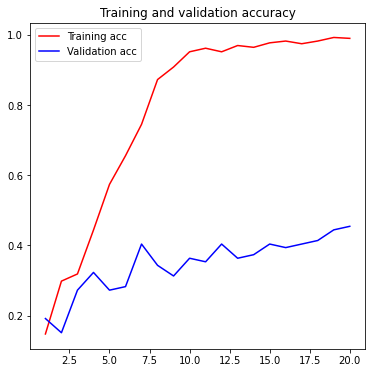

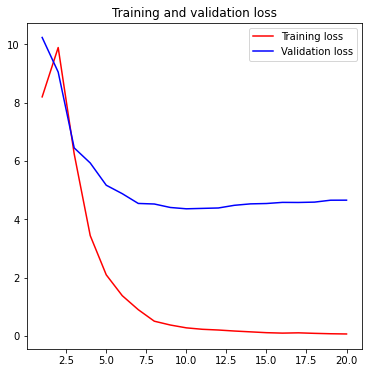

In [ ]:
acc = textcnn_history.history['accuracy']
val_acc = textcnn_history.history['val_accuracy']
loss = textcnn_history.history['loss']
val_loss = textcnn_history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend()

plt.show()

In [ ]:
# Bidrectional LSTM with convolution
# from https://www.kaggle.com/eashish/bidirectional-gru-with-convolution

inp = Input(shape=(maxlen,), dtype='int32')
x = embedding_layer(inp)
x = SpatialDropout1D(0.2)(x)
x = Bidirectional(GRU(128, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(x)
x = Conv1D(64, kernel_size=3)(x)
avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPooling1D()(x)
x = concatenate([avg_pool, max_pool])
outp = Dense(len(int_category), activation="softmax")(x)

BiGRU = Model(inp, outp)
BiGRU.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

BiGRU.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2000)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 2000, 50)     676550      input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d (SpatialDropo (None, 2000, 50)     0           embedding[0][0]                  
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 2000, 256)    138240      spatial_dropout1d[0][0]          
______________________________________________________________________________________________

In [ ]:
# training

bigru_history = BiGRU.fit(x_train, 
                          y_train, 
                          batch_size=128, 
                          epochs=50, 
                          validation_data=(x_val, y_val))

Epoch 1/50
4/4 [==============================] - 42s 11s/step - loss: 4.0751 - acc: 0.0255 - val_loss: 3.1612 - val_acc: 0.2424
Epoch 2/50
4/4 [==============================] - 42s 10s/step - loss: 3.1853 - acc: 0.2168 - val_loss: 2.6498 - val_acc: 0.3737
Epoch 3/50
4/4 [==============================] - 42s 11s/step - loss: 2.8966 - acc: 0.2908 - val_loss: 2.4066 - val_acc: 0.3737
Epoch 4/50
4/4 [==============================] - 45s 11s/step - loss: 2.6682 - acc: 0.3163 - val_loss: 2.3426 - val_acc: 0.4242
Epoch 5/50
4/4 [==============================] - 43s 11s/step - loss: 2.5843 - acc: 0.3699 - val_loss: 2.2159 - val_acc: 0.4242
Epoch 6/50
4/4 [==============================] - 42s 11s/step - loss: 2.4774 - acc: 0.3648 - val_loss: 2.1490 - val_acc: 0.4141
Epoch 7/50
4/4 [==============================] - 41s 10s/step - loss: 2.4548 - acc: 0.3444 - val_loss: 2.1302 - val_acc: 0.4242
Epoch 8/50
4/4 [==============================] - 42s 11s/step - loss: 2.4067 - acc: 0.3469 - val

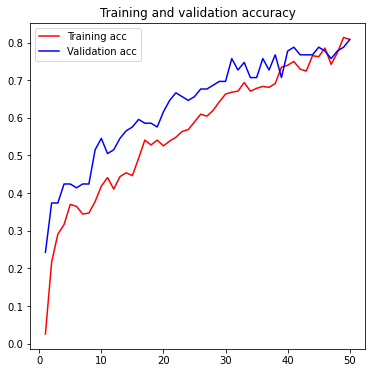

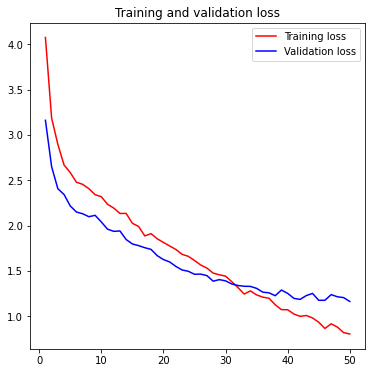

In [ ]:
plt.rcParams['figure.figsize'] = (6,6)

acc = bigru_history.history['acc']
val_acc = bigru_history.history['val_acc']
loss = bigru_history.history['loss']
val_loss = bigru_history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend()

plt.show()

In [ ]:
def evaluate_accuracy(model):
    predicted = model.predict(x_val)
    diff = y_val.argmax(axis=-1) - predicted.argmax(axis=-1)
    corrects = np.where(diff == 0)[0].shape[0]
    total = y_val.shape[0]
    return float(corrects/total)

In [ ]:
print("model Bidirectional GRU + Conv:  %.6f" % evaluate_accuracy(BiGRU))

##finally getting an accuracy of 80% using bidirectional lstm + convnet model. Using ensemble techniques the accuracy can be increased but it could lead 
##lead to overfitting and generalize less to any test dataset.